In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

In [2]:
# Load data into a dataframe named "df"
df = pd.read_csv('DataSetForPhishingVSBenignUrl.csv', header=0)
df

Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
0                0                   4                 5           5.500000   
1                0                   4                 5           5.500000   
2                0                   4                 5           5.500000   
3                0                   4                12           5.500000   
4                0                   4                 6           5.500000   
...            ...                 ...               ...                ...   
36702           29                   4                14           5.750000   
36703            0                   4                13           3.750000   
36704           58                   3                27           6.666666   
36705           35                   3                13           4.333334   
36706           40                   3                25           6.666666   

       longdomaintokenlen  avgpathtokenlen  tld  charcompvowels  charcompace  \
0                      14         4.400000    4               8            3   
1                      14         6.000000    4              12            4   
2                      14         5.800000    4              12            5   
3                      14         5.500000    4              32           16   
4                      14         7.333334    4              18           11   
...                   ...              ...  ...             ...          ...   
36702                  12         3.666667    4              20           24   
36703                   8         8.461538    4              24           23   
36704                  16         3.375000    3              41           34   
36705                   9         3.600000    3              15           13   
36706                  16         3.250000    3              35           31   

       ldl_url  ...  SymbolCount_FileName  SymbolCount_Extension  \
0            0  ...                     1                      0   
1            0  ...                     0                      0   
2            0  ...                     0                      0   
3            0  ...                     0                      0   
4            0  ...                     0                      0   
...        ...  ...                   ...                    ...   
36702        3  ...                     3                      2   
36703        0  ...                    16                     15   
36704       20  ...                     8                      7   
36705        7  ...                     9                      8   
36706       19  ...                     7                      6   

       SymbolCount_Afterpath  Entropy_URL  Entropy_Domain  \
0                         -1     0.726298        0.784493   
1                         -1     0.688635        0.784493   
2                         -1     0.695049        0.784493   
3                         -1     0.640130        0.784493   
4                         -1     0.681307        0.784493   
...                      ...          ...             ...   
36702                      7     0.690555        0.791265   
36703                     -1     0.665492        0.820010   
36704                      9     0.656807        0.801139   
36705                      3     0.725963        0.897617   
36706                      7     0.674351        0.801139   

       Entropy_DirectoryName  Entropy_Filename  Entropy_Extension  \
0                   0.894886          0.850608                NaN   
1                   0.814725          0.859793           0.000000   
2                   0.814725          0.801880           0.000000   
3                   0.814725          0.663210           0.000000   
4                   0.814725          0.804526           0.000000   
...                      ...               ...                ...   
36702               0.777498          0.690227           0.65668

In [3]:
# Print the shape of the original data set, for reference
print(f"shape of data set before dropping na rows: {df.shape}")

# Drop any rows that have NaN values
df.dropna(inplace=True)

# Print the shape of the modified data set
print(f"shape of data set after dropping na rows: {df.shape}")

shape of data set before dropping na rows: (36707, 80)
shape of data set after dropping na rows: (18982, 80)


In [4]:
# Pull out only the "benign" and "phishing" records. Then combine into a new dataframe.
benign_data = df[df['URL_Type_obf_Type'] == "benign"]
phishing_data = df[df['URL_Type_obf_Type'] == "phishing"]

df = pd.concat([benign_data, phishing_data])
print(f"shape of data set with only benign and phishing: {df.shape}")

shape of data set with only benign and phishing: (6723, 80)


In [5]:
# Set the feature set (X) to all columns of the data set except the last.
X = df.drop(columns=df.columns[-1], 
        axis=1, 
        inplace=False)
print(f"shape of X: {X.shape}")

# Create an ndarray "y" from the last column of the data set.
y = df.iloc[:, -1].values
print(f"shape of y: {y.shape}")
print()

# Print the number of records of each class
from collections import Counter
class_counts = Counter(y)
print("Count of records of each type:")
for c in class_counts:
    print(f"{c}: {class_counts[c]}")

shape of X: (6723, 79)
shape of y: (6723,)

Count of records of each type:
benign: 2709
phishing: 4014


In [6]:
# Split the data into a training set (80%) and testing set (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"training set shape: {X_train.shape}")
print(f"testing set shape: {X_test.shape}")

training set shape: (5378, 79)
testing set shape: (1345, 79)


### Apply the Scikit Learn AdaBoost Classifier code to the dataset for classifying phishing vs benign using and all feature at once and upload your .ipynb file. Use a Decision Tree Classifier at your base classifier. Use decision trees of varying depths(1,3,6,9,12,15,18 for both gini and entropy criterion) for the base classifier.

In [7]:
# Train AdaBoost classifiers using the specified depths and specified criterions. Print the accuracy at each depth
# to the screen, and also save the accuracies into "ada_scores".
depths = (1,3,6,9,12,15,18)

ada_scores = {"gini": [], "entropy": []}
for d in depths:
    for crit in ("gini", "entropy"):
        clf = DecisionTreeClassifier(random_state=0, max_depth=d, criterion = crit)
        clf.fit(X_train, y_train)        
        ada = AdaBoostClassifier(base_estimator=clf, n_estimators=50, random_state=0)
        ada.fit(X_train, y_train)
        score = ada.score(X_test, y_test)
        ada_scores[crit].append(score) # Add current score to scores
        print(f"criterion: {crit:8}  depth: {d}  accuracy: {score:.4f}")

criterion: gini      depth: 1  accuracy: 0.9613
criterion: entropy   depth: 1  accuracy: 0.9628
criterion: gini      depth: 3  accuracy: 0.9717
criterion: entropy   depth: 3  accuracy: 0.9740
criterion: gini      depth: 6  accuracy: 0.9725
criterion: entropy   depth: 6  accuracy: 0.9755
criterion: gini      depth: 9  accuracy: 0.9755
criterion: entropy   depth: 9  accuracy: 0.9747
criterion: gini      depth: 12  accuracy: 0.9747
criterion: entropy   depth: 12  accuracy: 0.9755
criterion: gini      depth: 15  accuracy: 0.9747
criterion: entropy   depth: 15  accuracy: 0.9643
criterion: gini      depth: 18  accuracy: 0.9606
criterion: entropy   depth: 18  accuracy: 0.9532


In [8]:
# For comparison, train Decision Tree classifiers using the same specified depths and specified criterions. 
# Print the accuracy at each depth to the screen, and also save the accuracies into "dt_scores".
depths = (1,3,6,9,12,15,18)

dt_scores = {"gini": [], "entropy": []}
for d in depths:
    for crit in ("gini", "entropy"):
        clf = DecisionTreeClassifier(random_state=0, max_depth=d, criterion = crit)
        clf.fit(X_train, y_train)        
        score = clf.score(X_test, y_test)
        dt_scores[crit].append(score) # Add current score to scores
        print(f"criterion: {crit:8}  depth: {d}  accuracy: {score:.4f}")

criterion: gini      depth: 1  accuracy: 0.7799
criterion: entropy   depth: 1  accuracy: 0.7703
criterion: gini      depth: 3  accuracy: 0.9011
criterion: entropy   depth: 3  accuracy: 0.9011
criterion: gini      depth: 6  accuracy: 0.9361
criterion: entropy   depth: 6  accuracy: 0.9323
criterion: gini      depth: 9  accuracy: 0.9524
criterion: entropy   depth: 9  accuracy: 0.9576
criterion: gini      depth: 12  accuracy: 0.9569
criterion: entropy   depth: 12  accuracy: 0.9591
criterion: gini      depth: 15  accuracy: 0.9532
criterion: entropy   depth: 15  accuracy: 0.9606
criterion: gini      depth: 18  accuracy: 0.9539
criterion: entropy   depth: 18  accuracy: 0.9584


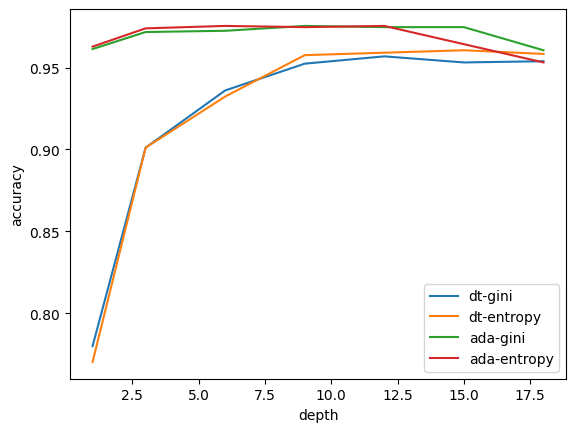

In [9]:
%matplotlib inline

# Create a graph, where the X-axis is the depth and Y-axis is the accuracy. Create one line for
# each criterion (gini and entropy). Show accuracies for Decision Tree classifier, and also for the
# AdaBoost classifier based on each criterion (gini and entropy).
dt_gini = np.array(dt_scores["gini"])
dt_entropy = np.array(dt_scores["entropy"])
ada_gini = np.array(ada_scores["gini"])
ada_entropy = np.array(ada_scores["entropy"])

plt.plot(depths, dt_gini, label='dt-gini')
plt.plot(depths, dt_entropy, label='dt-entropy')
plt.plot(depths, ada_gini, label='ada-gini')
plt.plot(depths, ada_entropy, label='ada-entropy')
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.legend(loc='lower right')
plt.show()

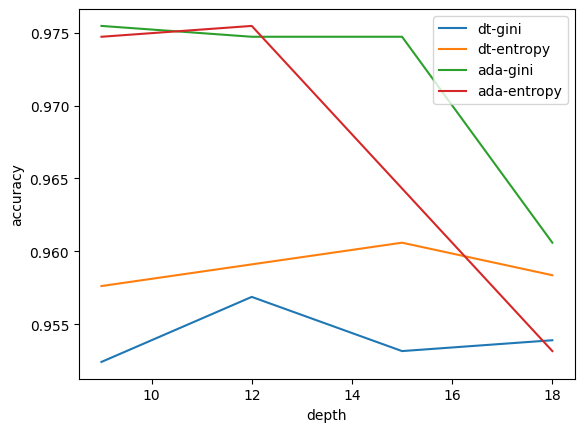

In [10]:
%matplotlib inline

# Same graph, but zoom in on depths of 9+ so we can see the peak accuracy values
zoom_depth = (9,12,15,18)

# Create a graph, where the X-axis is the depth and Y-axis is the accuracy. Create one line for
# each criterion (gini and entropy).
dt_gini = np.array(dt_scores["gini"][3:])
dt_entropy = np.array(dt_scores["entropy"][3:])
ada_gini = np.array(ada_scores["gini"][3:])
ada_entropy = np.array(ada_scores["entropy"][3:])

plt.plot(zoom_depth, dt_gini, label='dt-gini')
plt.plot(zoom_depth, dt_entropy, label='dt-entropy')
plt.plot(zoom_depth, ada_gini, label='ada-gini')
plt.plot(zoom_depth, ada_entropy, label='ada-entropy')
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.legend(loc='upper right')
plt.show()

### Compare your results with those you obtained last week when you used the Scikit Decision Tree Classifier(Week 5 assignment).

The accuracy for the AdaBoost classifiers were much higher at each depth level. At a depth of 1, the AdaBoost classifiers got an accuracy of 96.1% (gini) and 96.3% (entropy), which is higher than the accuracy at any of the tested depths of the Decision Tree classifier on its own. The accuracy of the AdaBoost classifiers leveled off at a relatively low depth. The AdaBoost classifier using gini got its highest accuracy at a depth of 9 (97.6%), which the entropy version got its highest accuracy at a depth of 12 (also 97.6%). Both classifiers decreased in accuracy at higher depths, likely resulting from overfitting.

The AdaBoost classifiers achieved better accuracies at their peaks than the Decision Tree classifiers on their own reached at any depth. As the depths increased above 12 however and overfitting occurred, the accuracy of the AdaBoost classifiers decreased to about the level of the Decision Tree classifiers at the same depth.